In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/customer Churn/Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.info()

NameError: name 'df' is not defined

#Replacing blanks with 0 as tenure are zero

In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", "0")
df['TotalCharges'] = df['TotalCharges'].astype("float")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df['customerID'].duplicated().sum()

np.int64(0)

Convert 0/1 to "yes/no" to make it easier to understand values

In [ ]:
def cov(value):
  if value == 1:
    return "yes"
  else:
    return "no"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(cov)

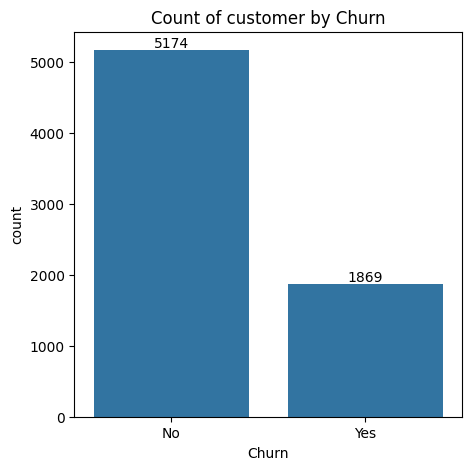

In [ ]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x='Churn', data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of customer by Churn")
plt.show()

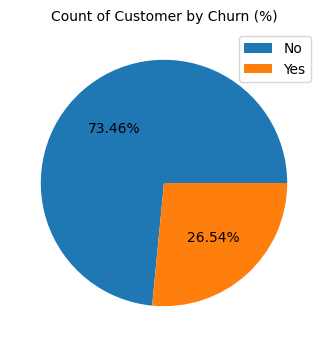

In [ ]:
plt.figure(figsize = (4,4))
gb = df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb['Churn'], autopct="%1.2f%%")
plt.title("Count of Customer by Churn (%)", fontsize=10)
plt.legend(labels=gb.index,)
plt.show()

from given pie chart we can conclude that 26.54% of our customer is churned out

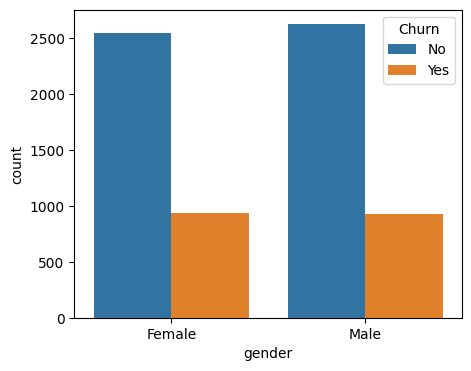

In [ ]:
plt.figure(figsize = (5,4))
sns.countplot(x = 'gender', data=df, hue="Churn")
plt.show()

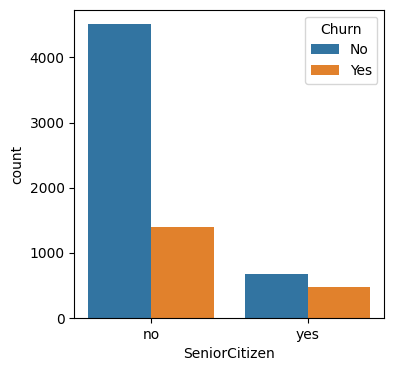

In [ ]:
plt.figure(figsize = (4,4))
p = sns.countplot(x = 'SeniorCitizen', data=df, hue="Churn")
plt.show()

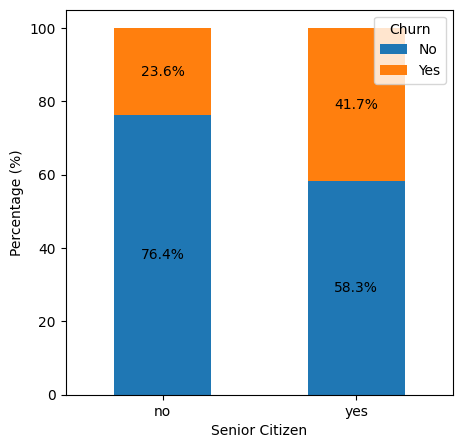

In [ ]:
fig, ax = plt.subplots(figsize = (5,5))
total_count = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()*100
total_count.plot(kind = 'bar', stacked=True, ax=ax, color =['#1f77b4', '#ff7f0e'])
for p in ax.patches:
  width, height = p.get_width(), p.get_height()
  x, y = p.get_xy()
  ax.text(x+width / 2, y + height / 2, f'{height:.1f}%', ha='center', va = 'center')

plt.xlabel("Senior Citizen")
plt.ylabel("Percentage (%)")
plt.legend(loc = 'upper right', title="Churn")
plt.xticks(rotation=0)
plt.show()

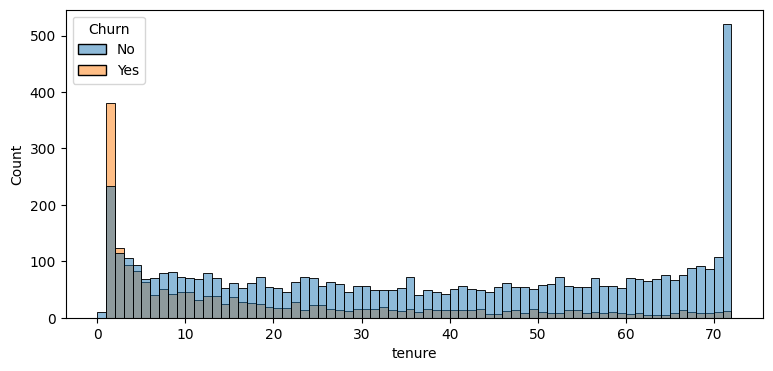

In [ ]:
plt.figure(figsize = (9,4))
sns.histplot(x="tenure", data=df, bins=72, hue="Churn")
plt.show()

People who have used our services for long time have stayed for longer time rather than who quite earlier

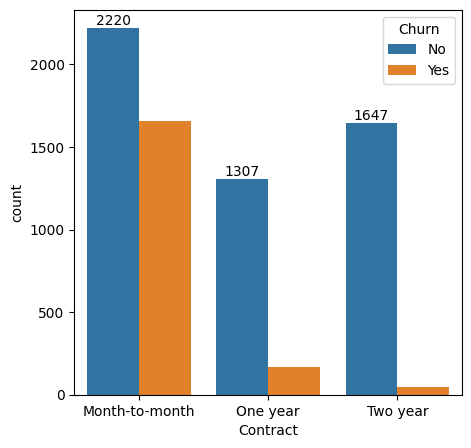

In [ ]:
plt.figure(figsize =(5,5))
ax = sns.countplot(x="Contract", data=df, hue="Churn")
ax.bar_label(ax.containers[0])
plt.show()

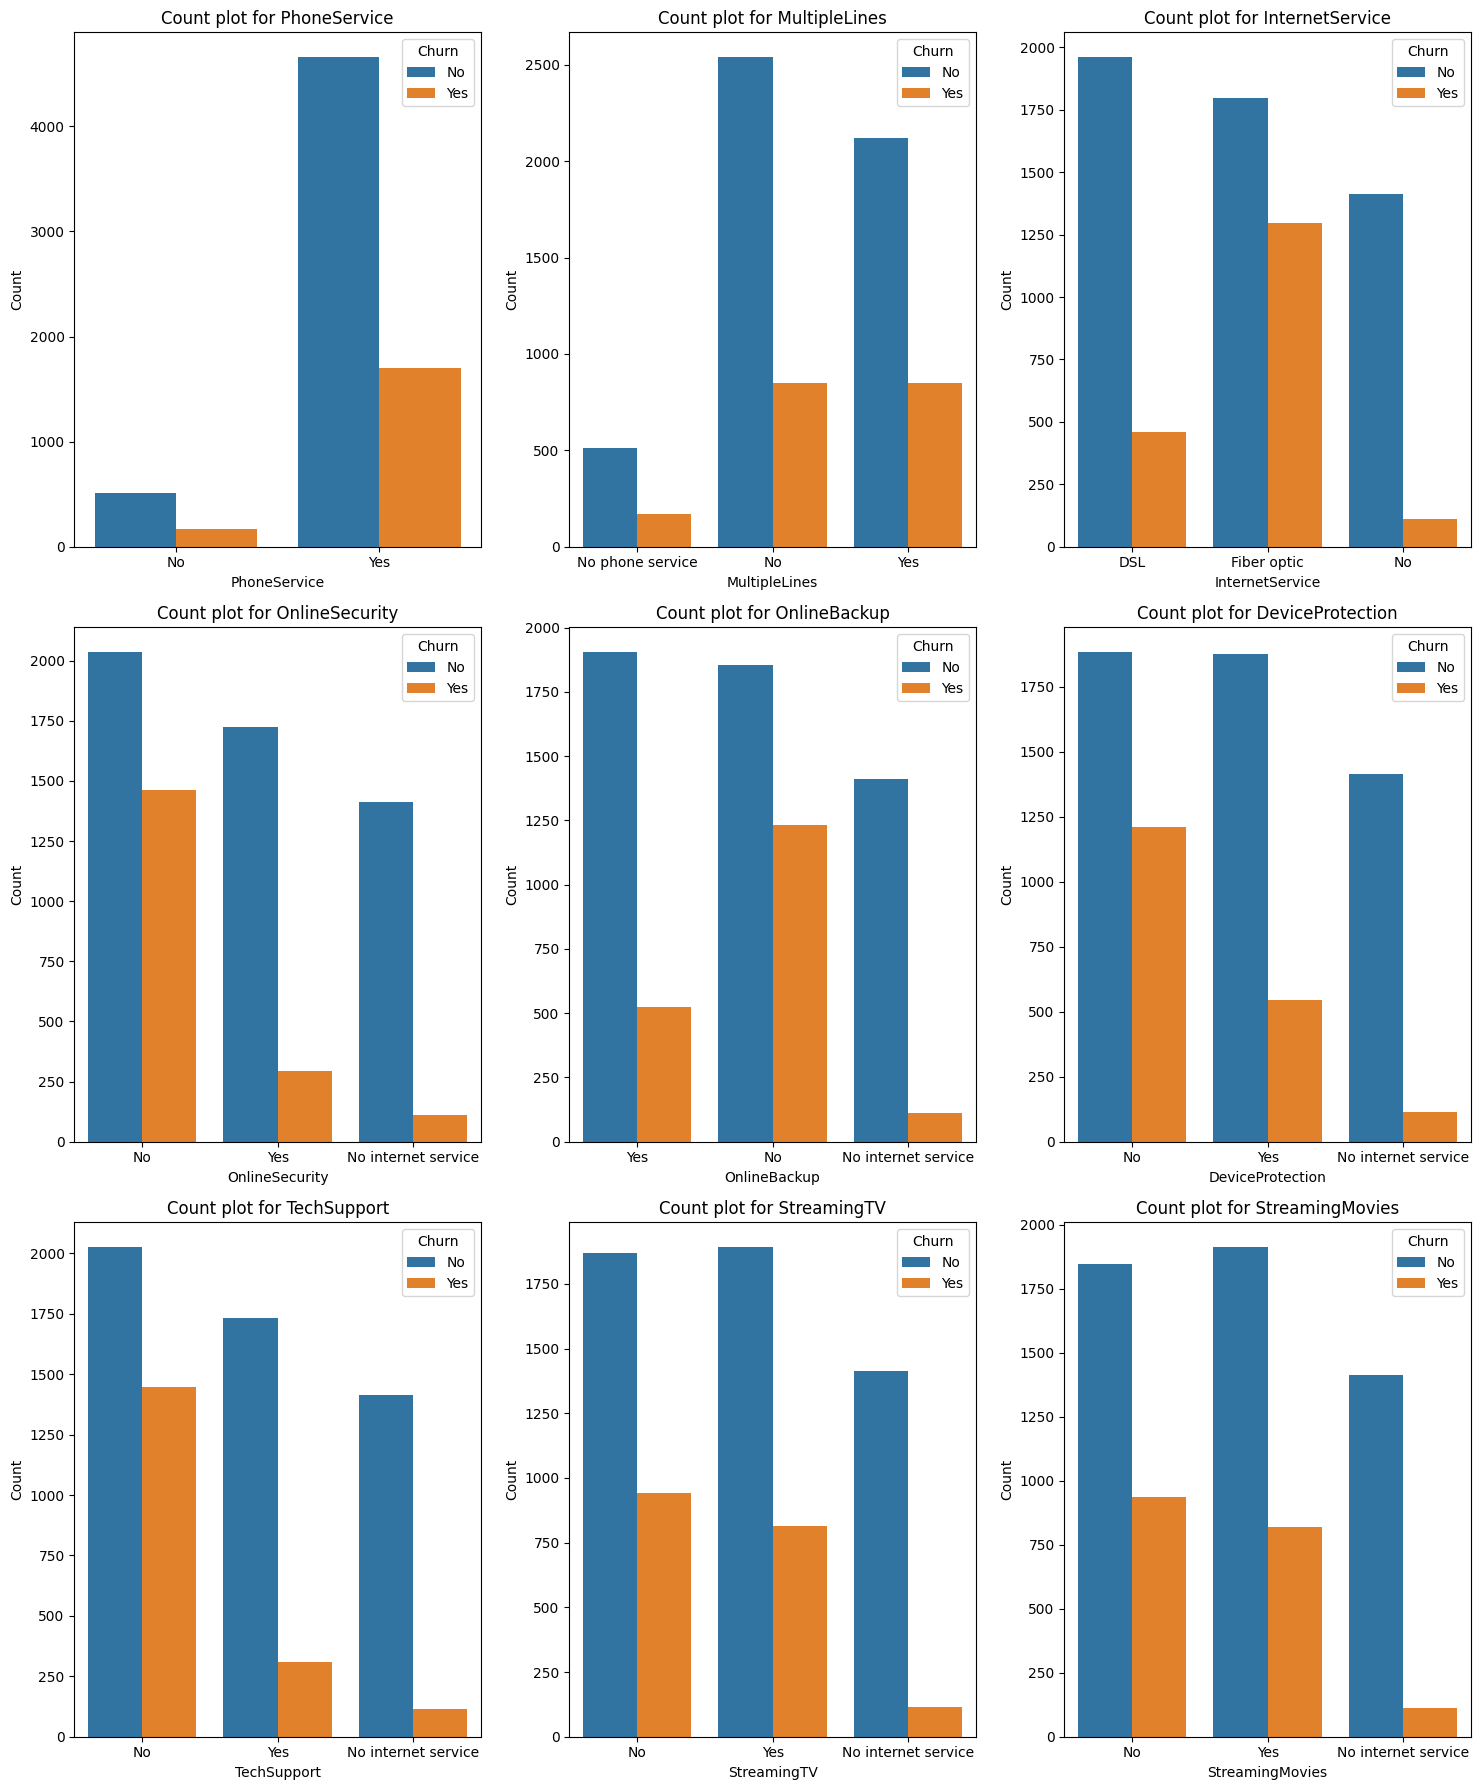

In [ ]:
columns = ['PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
n_cols = 3
n_rows = (len(columns) + n_cols - 1 ) // n_cols

fig, ax = plt.subplots(n_rows, n_cols, figsize = (15, n_rows * 6))
ax = ax.flatten()

for i, col in enumerate(columns):
  sns.countplot(x = col, data=df, ax = ax[i], hue="Churn")
  ax[i].set_title(f"Count plot for {col}")
  ax[i].set_xlabel(col)
  ax[i].set_ylabel("Count")

plt.tight_layout()
plt.show()


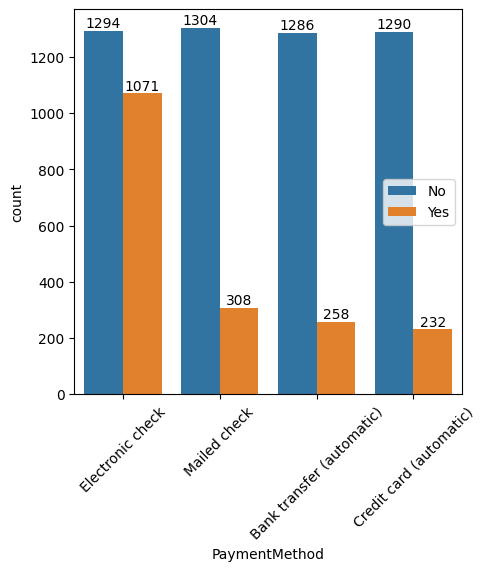

In [ ]:
plt.figure(figsize =(5,5))
ax = sns.countplot(x="PaymentMethod", data=df, hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation = 45)
plt.legend(loc = 'center right')
plt.show()